In [1]:

from qutip import *
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio


In [57]:
d=4                  #dimention of H
t=1 
deltat=0.1 
delta0=0.04
deltaz=0.0000
mu=0.8                        #units:eV
step = 300
sx=sigmax()
sy=sigmay()
sz=sigmaz()
s0=qeye(2)
he1=Qobj([[1,0],[0,0]])        # [1,0;0,0] to help covert h1 and delta to H
he2=Qobj([[0,0],[0,1]])        #[0,0;0,1]
he3=Qobj([[0,1],[0,0]])        #[0,1;0,0]
he4=Qobj([[0,0],[1,0]])        #[0.0;1,0]
eigE=np.zeros((step,d))
H=0*qeye(d)
k_max=np.pi/2
k_min=-np.pi/2
a=1/2
k_list=np.linspace(k_min,k_max,step)

Delta = delta0*qeye(2)+deltaz*sz


In [58]:
def create_H(k,D):
    h1=np.cos(k)*sx+deltat*np.sin(k)*sy-mu*qeye(2)
    k=-k
    h2=np.cos(k)*sx+deltat*np.sin(k)*sy-mu*qeye(2)             
    h2=-h2.trans()
    H=tensor(he1,h1)+tensor(he2,h2)+tensor(he3,D)+tensor(he4,D.conj())
    return H;



def delta_func(ome,ee):
    gamma = 0.02
    delt = (1/(ome-ee+1j*gamma))/np.pi
    return delt;


In [59]:
step2 = 200
sigma_1=[]
sigma_2=[]
v_23=[]
delta_k=(k_max-k_min)/step
omega = np.linspace(0,2,step2)
for j in trange (step2):
    sig1=0
    sig2=0
    for i in range (step):
        k=k_list[i]
    
        H=create_H(k,Delta)
        H_dk=create_H(k+delta_k,Delta) 
        H_2dk=create_H(k+delta_k+delta_k,Delta)
    
        v_k=(H_dk-H)/delta_k
        v_dk=(H_2dk-H_dk)/delta_k
    
        w_k=(v_dk-v_k)/delta_k
    
        eig=H.eigenstates()
        eigE[i]=eig[0]
        eigS=eig[1]
    
        v23 = (eigS[1].dag()*(v_k)).overlap(eigS[2])  #only consider the 2nd and 3rd level
        v32 = (eigS[2].dag()*(v_k)).overlap(eigS[1])
        #v_23.append(v23)
    
        w23 = (eigS[1].dag()*(w_k)).overlap(eigS[2])
        w32 = (eigS[2].dag()*(w_k)).overlap(eigS[1])
    
        E23 = eigE[i,1]-eigE[i,2]
        E32 = eigE[i,2]-eigE[i,1]
    
        sig1= sig1-v23*v32*delta_func(omega[j],E23)*delta_k/E23-v32*v23*delta_func(omega[j],E32)*delta_k/E32 
        
        sig2= sig2-(v23*w32)*delta_func(omega[j],E23)*delta_k/np.power(E23,2)\
              -(v32*w23)*delta_func(omega[j],E32)*delta_k/np.power(E32,2)
    sigma_1.append(sig1)
    sigma_2.append(sig2)



100%|██████████| 200/200 [10:23<00:00,  3.12s/it]


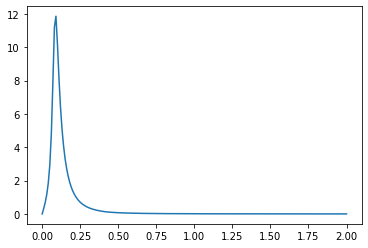

In [60]:
plt.plot(omega,np.imag(sigma_1))


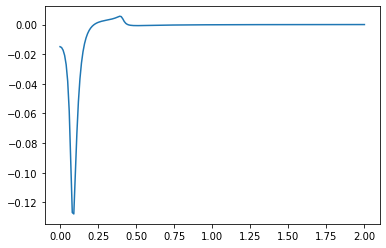

In [61]:
plt.plot(omega,np.imag(sigma_2))

In [45]:
for i in range (step):
    k=k_list[i]
    
    H=create_H(k,Delta)
    eigE[i]=H.eigenenergies()

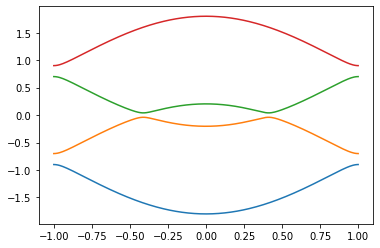

In [46]:
plt.plot(k_list/np.pi/a,eigE[0:step])

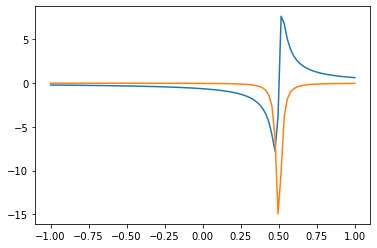

In [94]:
aa=np.linspace(-1,1,100)
yy=delta_func(aa,0.5)
plt.plot(aa,np.real(yy),aa,np.imag(yy))

In [346]:
v32

(-0.0055531140661126419-9.7144514654701197e-16j)

In [298]:
w23

(-0.0006662193077537254-1.1140177322288558e-17j)

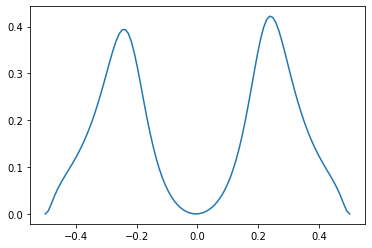

In [87]:
plt.plot(k_list/np.pi,np.conj(v_23[0:step])*v_23[0:step])

In [85]:
eigS[1].dag()*eigS[1]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

In [ ]:
+v23*v32*delta_func(omega[j]-E23)*delta_k/omega[j]